## Import Python Modules

In [121]:
%cd /Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer
%load_ext rpy2.ipython
import pandas as pd
import numpy as np
import glob
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition as sk

/Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Define Input and Output Files

In [71]:
# Define infile and outfile
infile = "./rawdata/tfspace.txt"
outfile 

'/Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer/rawdata/TCGA-OV-fpkm-uq_chea.txt'

### Test the code

In [87]:
df_tf_na = df_tf.fillna(value = 1)

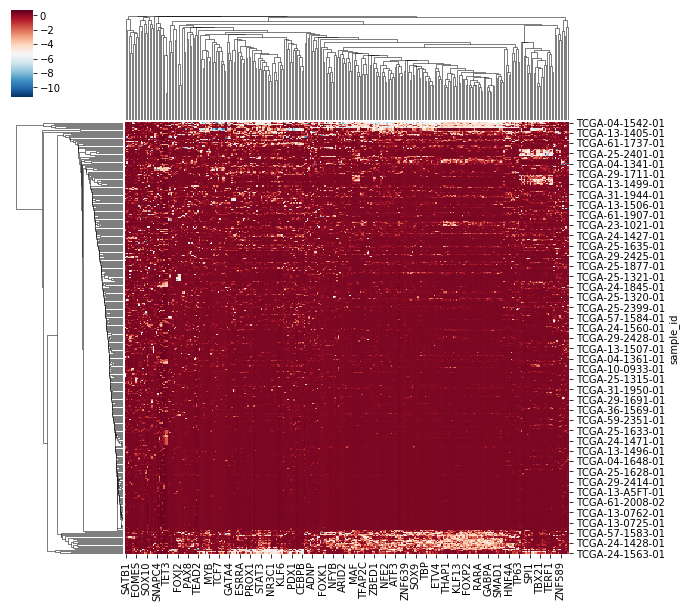

In [157]:
# making clustermap of tf data

# df_tf = pd.read_table(infile).set_index("sample_id")

df_tf = pd.read_table(infile)

# fig, ax = plt.subplots(figsize=(20,10))
sns.clustermap(np.log10(df_tf_na+1), z_score=1, cmap="RdBu_r")


plt.show()    


In [139]:
df_tf_na = df_tf_na.T

In [ ]:
# iris = load_iris()
# X = iris.data
# y = iris.target

# n_components = 2
# ipca = IncrementalPCA(n_components=n_components, batch_size=10)
# X_ipca = ipca.fit_transform(X)

# pca = PCA(n_components=n_components)
# X_pca = pca.fit_transform(X)

# colors = ['navy', 'turquoise', 'darkorange']

# for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
#     plt.figure(figsize=(8, 8))
#     for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
#         plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
#                     color=color, lw=2, label=target_name)

#     if "Incremental" in title:
#         err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
#         plt.title(title + " of iris dataset\nMean absolute unsigned error "
#                   "%.6f" % err)
#     else:
#         plt.title(title + " of iris dataset")
#     plt.legend(loc="best", shadow=False, scatterpoints=1)
#     plt.axis([-4, 4, -1.5, 1.5])

# plt.show()


In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])

# finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


from sklearn.decomposition import PCA
pca_plot = PCA(n_components=2)
principalComponents = pca.fit_transform(df_tf_na)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])



In [127]:
df_tf_na.to_csv("./rawdata/df_tf_na.txt", sep = '\t')

In [133]:
from sklearn.decomposition import PCA as pc
pca = pc(n_components=2)
pca.fit(df_tf_na)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [158]:
df_tf_na

,ADNP,AHR,AR,ARID2,ARID3A,ARNT,ARNTL,ASCL1,ATF1,ATF2,...,ZNF589,ZNF592,ZNF639,ZNF644,ZNF740,ZNF750,ZNF766,ZNF83,ZNF92,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-04-1331-01,0.999848,0.999571,0.999990,1.000000,1.000000,0.999990,0.999990,0.999960,1.000000,0.999861,...,0.999956,0.994858,0.999848,1.000000,0.998730,1.000000,0.999977,1.000000,0.999990,0.958938
TCGA-04-1332-01,0.953173,0.955610,0.986745,0.997115,0.997115,0.926679,0.999571,0.926679,0.997061,0.993543,...,0.999956,0.994858,1.000000,0.999998,0.973335,0.997115,0.999997,0.999956,0.993200,0.891196
TCGA-04-1338-01,1.000000,0.999571,0.955610,1.000000,1.000000,0.999990,0.993543,0.999861,1.000000,0.998828,...,0.996892,0.806201,0.999533,0.997115,0.999533,0.998828,0.998067,0.999989,0.999990,0.958938
TCGA-04-1341-01,0.973335,0.997115,0.999960,0.766586,0.926679,0.766586,0.515307,0.886073,0.764568,0.766586,...,0.996892,0.981787,0.953173,0.926679,0.680054,0.974851,0.986213,0.826034,0.418730,0.779231
TCGA-04-1343-01,0.680054,0.974851,0.998828,0.604383,0.426694,0.515307,0.999571,0.515307,0.687142,0.955610,...,0.758447,0.690290,0.332752,0.832659,0.680054,0.689486,0.970034,0.985872,0.335242,0.958938
TCGA-04-1347-01,0.998730,1.000000,0.999990,0.999861,0.993543,0.997115,0.999571,0.986745,0.999562,0.998828,...,0.999848,0.999026,0.999848,0.974851,0.999956,0.999960,0.999870,0.998730,0.998755,0.958938
TCGA-04-1350-01,0.999956,0.999990,0.997115,0.997115,0.999960,0.999861,0.999990,0.998828,0.999960,0.974851,...,1.000000,0.994858,0.999848,0.999861,0.999989,1.000000,0.999440,0.999956,0.998755,0.958938
TCGA-04-1356-01,0.999998,0.999998,0.997115,0.993543,0.926679,0.997115,0.832659,0.997115,0.998804,0.999960,...,0.999956,0.806201,0.953173,0.998828,0.998730,0.999571,0.994431,0.999956,0.999958,0.998641
TCGA-04-1357-01,0.993082,0.999571,0.999571,0.999990,0.999960,0.999998,0.999990,1.000000,0.999562,0.604383,...,0.996892,0.981787,0.999998,0.999861,0.993082,1.000000,0.986213,0.999533,0.986095,0.632035


In [147]:
# following steps from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

from sklearn.preprocessing import StandardScaler
tfs = list(df_tf_na.columns.values)

# separating out the tfs
x = df_tf_na.loc[:, tfs].values

# separating out the samples
y = df_tf_na.index.values



# standardizing the features
x = StandardScaler().fit_transform(x)

In [149]:
# still following link above

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component 1", "principal component 2"])

In [163]:
# still following link

# finalDf= pd.concat([principalDf, df_tf_na.index.values], axis = 1)
finalDf = principalDf
finalDf["sample_id"] = df_tf_na.index

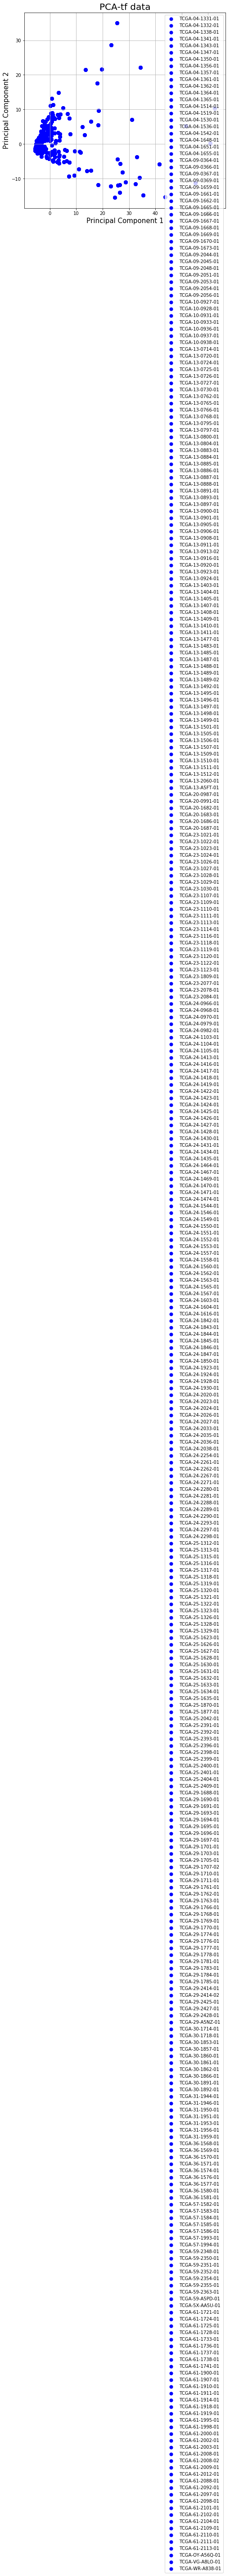

In [183]:
# still following link

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA-tf data', fontsize = 20)
samples = list(df_tf_na.index.values)
# colors = ['r', 'g', 'b']
# for target, color in zip(samples,colors):
for sample in zip(samples):
    indicesToKeep = finalDf['sample_id'] == samples
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(samples)
ax.grid()

In [172]:
# repeating PCA on expression data

exp_infile = ("./rawdata/TCGA-OV-fpkm-uq_zscore.txt")
exp_df = pd.read_table(exp_infile).set_index("gene_symbol")

In [177]:
exp_df.head()

gene_symbol,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-04-1331-01,3.453510,1.977759,-0.154518,-0.202513,-0.786031,0.389903,-0.039120,-0.131772,0.813521,-0.577149,...,1.554440,-0.574994,-0.198958,-0.463046,1.757854,-0.195315,2.954103,-0.915798,-0.281090,0.067628
TCGA-04-1332-01,-0.134547,-0.404266,-0.221775,0.857041,-0.080410,0.099903,-0.377877,0.008313,0.524188,0.270056,...,-0.767706,0.606222,-0.189829,-0.330970,-0.525205,-0.242669,-0.746013,-0.095896,1.746285,-1.397011
TCGA-04-1338-01,0.867967,0.049503,0.002566,-0.413354,-0.664682,0.280103,1.336759,-0.030077,-0.029438,-0.223477,...,-0.303856,-0.872712,-0.661406,-0.619870,-0.430781,-0.130569,0.538036,1.416110,-0.233230,-1.172972
TCGA-04-1341-01,0.012802,-0.145450,-0.012125,-0.896349,-0.404915,-0.291065,-0.281471,-0.052221,2.713774,-0.505033,...,0.702668,-0.678048,-0.424513,-0.458474,-0.459866,-0.108431,-1.721896,2.349223,0.098726,-1.636894
TCGA-04-1343-01,2.528017,1.897298,-0.035803,-0.305846,-0.434804,-0.363767,-0.319922,-0.043796,-0.101398,2.086093,...,-1.088982,-1.118753,-1.275916,0.733057,1.918641,-0.109847,-0.172244,1.693168,2.740753,-0.948225


In [174]:
exp_df = exp_df.T

In [176]:
exp_df.index.name = "sample_id"

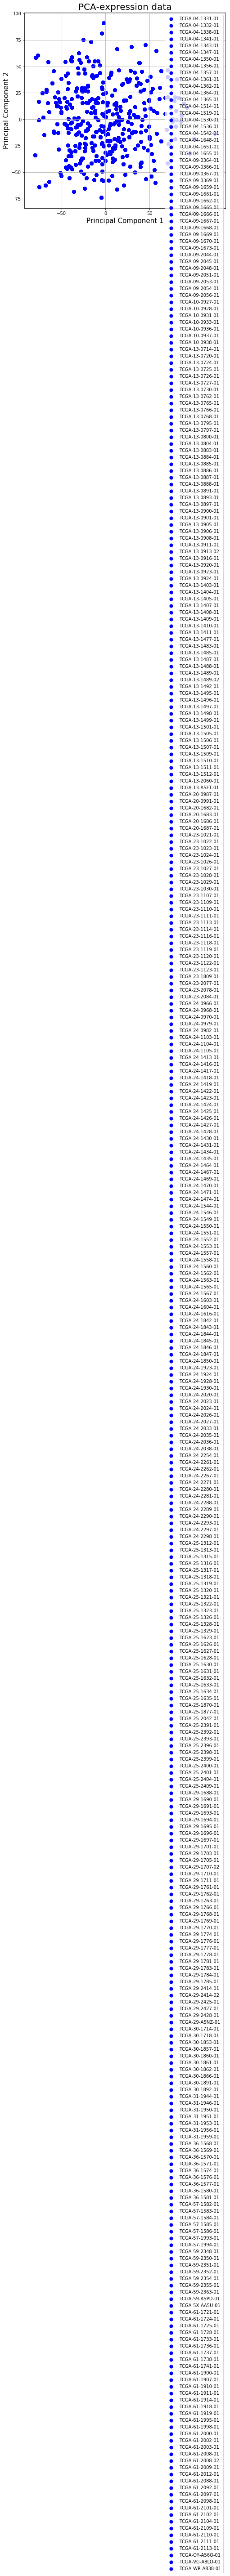

In [182]:
# following steps from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# pca2 for expression data

genes = list(exp_df.columns.values)

# separating out the tfs
x2 = exp_df.loc[:, genes].values

# separating out the samples
y2 = exp_df.index.values

# standardizing the features
x2 = StandardScaler().fit_transform(x2)


# still following link above

pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(x2)
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ["principal component 1", "principal component 2"])

# still following link

# finalDf= pd.concat([principalDf, df_tf_na.index.values], axis = 1)
finalDf2 = principalDf2
finalDf2["sample_id"] = exp_df.index


# still following link

fig2 = plt.figure(figsize = (8,8))
ax = fig2.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA-expression data', fontsize = 20)
samples2 = list(exp_df.index.values)
# colors = ['r', 'g', 'b']
# for target, color in zip(samples2,colors):
for sample in zip(samples2):
    indicesToKeep = finalDf2['sample_id'] == samples2
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(samples2)
ax.grid()

In [198]:
df_tf_na_2 = df_tf_na_2.T

In [199]:
df_tf_na_2.head()

sample_id,TCGA-04-1331-01,TCGA-04-1332-01,TCGA-04-1338-01,TCGA-04-1341-01,TCGA-04-1343-01,TCGA-04-1347-01,TCGA-04-1350-01,TCGA-04-1356-01,TCGA-04-1357-01,TCGA-04-1361-01,...,TCGA-61-2101-01,TCGA-61-2102-01,TCGA-61-2104-01,TCGA-61-2109-01,TCGA-61-2110-01,TCGA-61-2111-01,TCGA-61-2113-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
ADNP,0.999848,0.953173,1.000000,0.973335,0.680054,0.998730,0.999956,0.999998,0.993082,0.680054,...,0.999848,0.826034,0.973335,0.999956,1.000000,0.999956,0.985872,0.923040,0.99873,0.999533
AHR,0.999571,0.955610,0.999571,0.997115,0.974851,1.000000,0.999990,0.999998,0.999571,0.993543,...,0.999990,0.999960,0.986745,0.926679,0.955610,0.426694,0.997115,0.999990,0.99996,0.997115
AR,0.999990,0.986745,0.955610,0.999960,0.998828,0.999990,0.997115,0.997115,0.999571,0.998828,...,0.999998,0.998828,0.974851,0.986745,0.999861,0.997115,0.993543,0.999960,1.00000,1.000000
ARID2,1.000000,0.997115,1.000000,0.766586,0.604383,0.999861,0.997115,0.993543,0.999990,0.999998,...,1.000000,0.955610,0.986745,0.999998,0.999960,0.999990,0.998828,0.997115,1.00000,1.000000
ARID3A,1.000000,0.997115,1.000000,0.926679,0.426694,0.993543,0.999960,0.926679,0.999960,0.999998,...,0.999998,0.926679,0.886073,0.999990,0.999998,0.999861,0.997115,0.999861,1.00000,0.999960


In [200]:
df_forclustergram = np.log10(df_tf_na_2 + 1)

In [202]:
df_forclustergram.to_csv("./rawdata/df_tf_na_log3.txt", sep = '\t')

In [213]:
exp_df.head()

gene_symbol,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-04-1331-01,3.453510,1.977759,-0.154518,-0.202513,-0.786031,0.389903,-0.039120,-0.131772,0.813521,-0.577149,...,1.554440,-0.574994,-0.198958,-0.463046,1.757854,-0.195315,2.954103,-0.915798,-0.281090,0.067628
TCGA-04-1332-01,-0.134547,-0.404266,-0.221775,0.857041,-0.080410,0.099903,-0.377877,0.008313,0.524188,0.270056,...,-0.767706,0.606222,-0.189829,-0.330970,-0.525205,-0.242669,-0.746013,-0.095896,1.746285,-1.397011
TCGA-04-1338-01,0.867967,0.049503,0.002566,-0.413354,-0.664682,0.280103,1.336759,-0.030077,-0.029438,-0.223477,...,-0.303856,-0.872712,-0.661406,-0.619870,-0.430781,-0.130569,0.538036,1.416110,-0.233230,-1.172972
TCGA-04-1341-01,0.012802,-0.145450,-0.012125,-0.896349,-0.404915,-0.291065,-0.281471,-0.052221,2.713774,-0.505033,...,0.702668,-0.678048,-0.424513,-0.458474,-0.459866,-0.108431,-1.721896,2.349223,0.098726,-1.636894
TCGA-04-1343-01,2.528017,1.897298,-0.035803,-0.305846,-0.434804,-0.363767,-0.319922,-0.043796,-0.101398,2.086093,...,-1.088982,-1.118753,-1.275916,0.733057,1.918641,-0.109847,-0.172244,1.693168,2.740753,-0.948225


In [221]:
exp_df2 = pd.read_table(exp_infile).set_index("gene_symbol")

### 1-calculate variance for each gene and make into df
## making heatmap from TCGA expression data--before zscores

# first, calculating variance across rows for each gene--only using top 500-2000 genes in the heatmap

expression_variance = []
expression_variance = exp_df.var(axis=0)

df_expression_variance = pd.DataFrame(expression_variance)

In [231]:
# 2-sort the values in variance column
df_expression_variance_sorted2 = df_expression_variance[0].sort_values(ascending = False)

# 3-make the sorted values into df
df_expression_variance_sorted3 = pd.DataFrame(df_expression_variance_sorted2)

# 4-take the top 1000 values
df_expression_variance_sorted3_top1000 = df_expression_variance_sorted3[:1000]

# 5-merge to get expression for each patient of top 1000 genes with most variance
df_expression_variance_3_top1000 = pd.merge(df_expression_variance_sorted3_top1000, exp_df.T, how='inner', on=["gene_symbol"])

# 6-transform df
df_expression_variance_3_top1000 = df_expression_variance_3_top1000.T

# 7-drop row of variance
df_expression_variance_3_top1000 = df_expression_variance_3_top1000[1:1001]

# 8-transform
df_expression_variance_3_top1000 = df_expression_variance_3_top1000.T


In [232]:
df_expression_variance_3_top1000.head()

,TCGA-04-1331-01,TCGA-04-1332-01,TCGA-04-1338-01,TCGA-04-1341-01,TCGA-04-1343-01,TCGA-04-1347-01,TCGA-04-1350-01,TCGA-04-1356-01,TCGA-04-1357-01,TCGA-04-1361-01,...,TCGA-61-2101-01,TCGA-61-2102-01,TCGA-61-2104-01,TCGA-61-2109-01,TCGA-61-2110-01,TCGA-61-2111-01,TCGA-61-2113-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
gene_symbol,,,,,,,,,,,,,,,,,,,,,
MIR5702,-0.131056,-0.198571,-0.079015,-0.051995,-0.041333,-0.138975,-0.075134,-0.072218,-0.020719,-0.079488,...,0.029969,-0.109099,0.008397,-0.088261,-0.100938,-0.066152,0.008994,-0.132812,-0.164174,-0.195793
TCEB1P14,-0.131056,-0.198571,-0.079015,-0.051995,-0.041333,-0.138975,-0.075134,-0.072218,-0.020719,-0.079488,...,0.029969,-0.109099,0.008397,-0.088261,-0.100938,-0.066152,0.008994,-0.132812,-0.164174,-0.195793
RNA5SP27,-0.131056,-0.198571,-0.079015,-0.051995,-0.041333,-0.138975,-0.075134,-0.072218,-0.020719,-0.079488,...,0.029969,-0.109099,0.008397,-0.088261,-0.100938,-0.066152,0.008994,-0.132812,-0.164174,-0.195793
SDR42E1P1,-0.131056,-0.198571,-0.079015,-0.051995,-0.041333,-0.138975,-0.075134,-0.072218,-0.020719,-0.079488,...,0.029969,-0.109099,0.008397,-0.088261,-0.100938,-0.066152,0.008994,-0.132812,-0.164174,-0.195793
GCG,-0.152579,-0.213341,-0.096282,-0.070897,-0.064280,-0.154097,-0.093395,-0.094404,-0.042500,-0.103954,...,0.008098,-0.123484,-0.018947,-0.111255,-0.119031,-0.084767,-0.017661,-0.149593,-0.183471,-0.211160


In [238]:
df_expression_variance_3_top1000_log = np.log10(df_expression_variance_3_top1000 + 1)



/Users/maayanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


ValueError: The condensed distance matrix must contain only finite values.

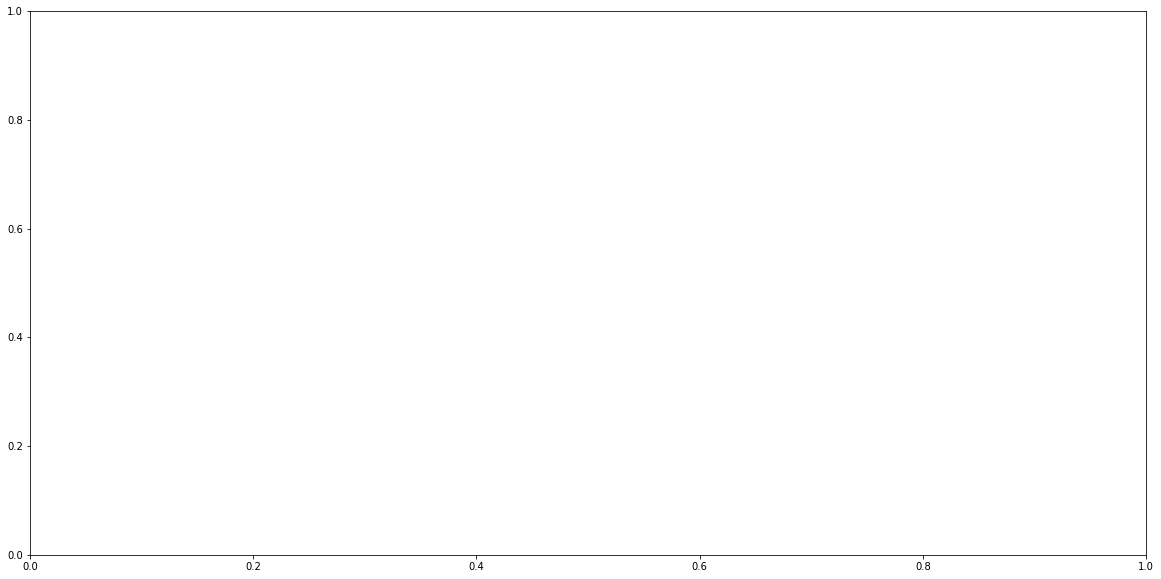

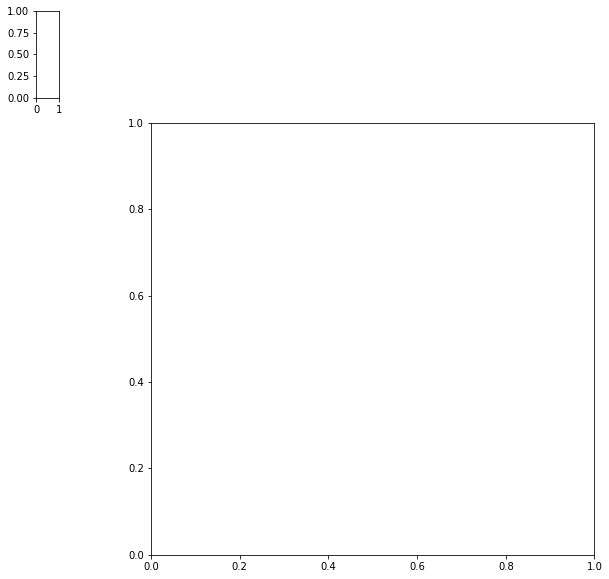

In [237]:

fig, ax = plt.subplots(figsize=(20,10))
sns.clustermap(df_expression_variance_3_top1000_log)


plt.show()

In [239]:
df_expression_variance_3_top1000_log.to_csv("./rawdata/expression_forclustergrammer.txt", sep = "\t")

In [266]:
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import iplot
import scipy.stats as ss
import warnings
from IPython.display import display, Markdown
%cd /Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer
from tsne import *


/Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer


In [267]:
tsne_results = run(df_tf_na)

KeyError: 'logCPM'

In [263]:
# Plot t-SNE results
plot(tsne_results)

NameError: name 'tsne_results' is not defined

In [268]:
tf_tsne = TSNE(n_components=2).fit_transform(df_tf_na)

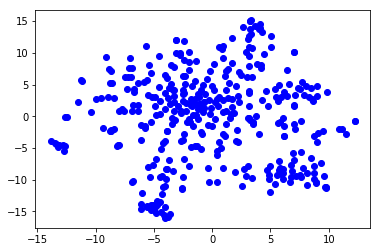

In [283]:
Y = tf_tsne
plt.scatter(Y[:, 0], Y[:,1], c=color, cmap=plt.cm.Spectral)
plt.show()

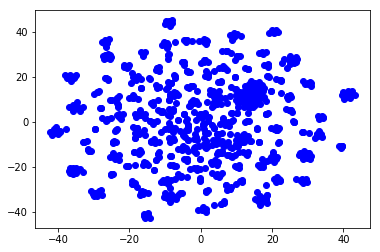

In [280]:
exp_tsne = TSNE(n_components=2).fit_transform(df_expression_variance_3_top1000)
Y2 = exp_tsne
plt.scatter(Y2[:, 0], Y2[:,1], c=color, cmap=plt.cm.Spectral)
plt.show()

## testing code for finding drug pairs

In [291]:
## subtract currently used ov cancer drug signature from patient's gene signature

# testing just by manually loading drug signature (just starting with up) for doxorubicin and one patient's gene signature

df_doxup = pd.read_table("../doxorubicinup.txt")
dox_up = list(df_doxup["ADAM9"])
patient_down = ["SLC35E2B",
            "TMEM150A",
            "GET4",
            "FBXL17",
            "NDST2",
            "SDF4",
            "DENND4A",
            "CAPN1",
            "MFSD12",
            "SPSB3",
            "PMM2",
            "DHDDS",
            "QDPR",
            "RNH1",
            "ZMYND11",
            "CREBRF",
            "PARK7",
            "SPPL2A",
            "TAB2",
            "LDB1",
            "RBM27",
            "BRE",
            "TAF12",
            "PEX12",
            "HMGA1P2",
            "RCN1",
            "DNAJA2",
            "CERK",
            "REEP5",
            "ANAPC15",
            "SSFA2",
            "TANGO2",
            "EIF3M",
            "MICU1",
            "ZBTB3",
            "HMGA1P3",
            "DNAJC16",
            "TMEM129",
            "PIGV",
            "BANF1",
            "EEF1A1P5",
            "SLC25A22",
            "NPTN",
            "ESRRA",
            "CTSF",
            "ATF6B",
            "GNA12",
            "DCUN1D5",
            "CD40",
            "CBX3P1",
            "ARNTL",
            "RPUSD2",
            "DESI1",
            "RNF6",
            "TMEM50A",
            "ZNF597",
            "VAMP3",
            "MPI",
            "TMEM223",
            "SDHD",
            "MEN1",
            "C16orf58",
            "PPIF",
            "POLR3E",
            "RIOK1",
            "EIF5AP4",
            "LINC00884",
            "SNAPC5",
            "YWHABP2",
            "APEH",
            "TMEM138",
            "PPIB",
            "IDH3A",
            "PTP4A2",
            "UBL7-AS1",
            "SIK3",
            "DLEU7",
            "ATF7IP2",
            "NEU3",
            "LYPLA2P1",
            "STIP1P3",
            "LRRC37A4P",
            "B3GAT3",
            "CLINT1",
            "EIF3H",
            "COPB2",
            "EID3",
            "CSE1L",
            "LINC00571",
            "GGCX",
            "EDEM1",
            "RER1",
            "APOBEC3G",
            "NOMO3",
            "C11orf72",
            "TMEM216",
            "CLPB",
            "FAM103A1",
            "SSSCA1-AS1",
            "JMY",
            "PCBD1",
            "ARPC4",
            "EIF4G3",
            "BRK1",
            "MRPS18B",
            "DVL1",
            "C11orf57",
            "SMN2",
            "EIF1P7",
            "ST13P13",
            "RMDN1",
            "EIF2D",
            "GPR137",
            "SSU72",
            "TRPT1",
            "ZNF223",
            "FAM172A",
            "MTFMT",
            "TMEM43",
            "SYF2",
            "CHST12",
            "VWA9",
            "STX3",
            "PHF23",
            "PDIA3P2",
            "PAAF1",
            "GPN2",
            "GRSF1",
            "SNRNP40",
            "SDHB",
            "ZNF726",
            "LARP1",
            "PTPN23",
            "BTD",
            "EIF3E",
            "DPF2",
            "FAM35A",
            "TMEM14C",
            "WARS2",
            "GRK2",
            "TRAF6",
            "DPH6",
            "MECR",
            "EIF3B",
            "ZFP36L2",
            "XRCC6P4",
            "UBE2B",
            "MAP1LC3B",
            "MPDU1",
            "HNMT",
            "PCNPP5",
            "VDAC1P1",
            "ERAP1",
            "TRAPPC4",
            "LSM12P1",
            "RNASET2",
            "NAT10",
            "RPL3",
            "TAF7",
            "CCNG1",
            "GEMIN5",
            "PCNX3",
            "ITPRIP",
            "RTN3",
            "UBE2D3",
            "MTHFD1L",
            "TP53",
            "MKRN2",
            "SDHAF2",
            "MAD1L1",
            "LACTB",
            "MARK2",
            "NOC3L",
            "CTNND1",
            "AMPD3",
            "JAGN1",
            "EXT2",
            "UQCRC2",
            "RAP1GDS1",
            "VPS18",
            "PRMT3",
            "CAPZB",
            "DNAAF5",
            "COPS2",
            "PPA2",
            "EIF4A1P4",
            "TMEM135",
            "RRP8",
            "FANCD2",
            "HEXA",
            "TUFM",
            "ZDHHC24",
            "MFN2",
            "PDHX",
            "METTL12",
            "WDR37",
            "SNAP23",
            "MRPL16",
            "MTHFD2P7",
            "SEC13",
            "LDLRAD3",
            "SLC41A3",
            "TXNDC5",
            "TMED3",
            "AHR",
            "ZNHIT2",
            "PLCB3",
            "AMD1",
            "PEX14",
            "PAK1IP1",
            "SLC9B1",
            "DNAJB12",
            "ATAD1",
            "AAGAB",
            "VPS11",
            "NCOA4",
            "C15orf57",
            "SDHC",
            "POLL",
            "PAFAH1B2",
            "SLC25A11",
            "RAB11A",
            "HACL1",
            "ARRB1",
            "MRTO4",
            "HM13",
            "HSPA9",
            "SPTY2D1",
            "CCNDBP1",
            "NAP1L5",
            "HIVEP1",
            "NDUFV1",
            "NT5DC1",
            "CFL1",
            "EFHD2",
            "TMEM51",
            "RPS6KA4",
            "APH1B",
            "TRAP1",
            "EMC1",
            "MAT2B",
            "CD164",
            "TPST2",
            "MMS19",
            "PTDSS1",
            "SSH3",
            "SETP8",
            "EIF5A",
            "PABPC1",
            "SNU13",
            "CDC23",
            "PCGF5",
            "MORF4L1",
            "ATP6V0C",
            "FAM114A2",
            "MFAP3",
            "NOLC1",
            "EEF2",
            "SMURF2P1",
            "TMED7",
            "BCL2L13",
            "PEX16",
            "POLD4",
            "PRKAR1B",
            "EHD1",
            "NIPAL3",
            "STK10",
            "LARS",
            "PACS1",
            "PPP6R3",
            "RICTOR",
            "FDX1",
            "TMEM87A",
            "OTUB1",
            "C2orf16",
            "MTMR14",
            "VDAC1",
            "API5",
            "RAB1C",
            "VRK2",
            "CCDC86",
            "TMEM87B",
            "NPM1P33",
            "IKBKG",
            "PELO",
            "MTHFS",
            "EIF1AD",
            "TRPM2",
            "DTWD2",
            "RPUSD1",
            "NFKB2",
            "RPA2",
            "WDR55",
            "CCNH",
            "SEC63P1",
            "UBE2V1P2",
            "TIMM10B",
            "PEF1",
            "TBL3",
            "CRELD1",
            "PI4K2A",
            "PANX1",
            "ADAM10",
            "KIAA2013",
            "VPS37C",
            "ARCN1",
            "MED19",
            "TYW3",
            "CDC42SE2",
            "CAPN7",
            "ZSWIM6",
            "IPO7",
            "AIMP2",
            "CCDC71",
            "SPCS2",
            "NPM1",
            "SLC16A5",
            "HSD17B4",
            "RRAS2",
            "PUM1",
            "BET1L",
            "AP3M1",
            "SSRP1",
            "PMS2",
            "TRIM44",
            "YIF1A",
            "NECAP2",
            "RHOG",
            "HARBI1",
            "RBAK",
            "PXMP4",
            "RPL4",
            "ZNF718",
            "ADAL",
            "SRSF8",
            "TLE3",
            "SCAMP2",
            "REXO2",
            "NUDT22",
            "POTEJ",
            "UBE4A",
            "HNRNPL",
            "PPP3CB",
            "LZIC",
            "ACP2",
            "FRMD8",
            "ERGIC1",
            "ARHGEF35",
            "SIK2",
            "SZRD1",
            "EAF1",
            "IDE",
            "G3BP1",
            "C11orf98",
            "PITHD1",
            "HYOU1",
            "VPS51",
            "VDAC2",
            "AASDHPPT",
            "UBXN1",
            "PTENP1",
            "FBXO38",
            "MRPL49",
            "TTC1",
            "ILK",
            "TM9SF3",
            "HPS1",
            "PAPSS1",
            "RPS6KB2",
            "SEC24C",
            "PRPF19",
            "TBC1D5",
            "SYVN1",
            "ATG2A",
            "TRAF7",
            "TMX2",
            "ANXA7",
            "CHCHD4",
            "BSCL2",
            "C1orf174",
            "ZPR1",
            "CSNK1A1",
            "DAP3",
            "UBLCP1",
            "ZNF174",
            "SEC24A",
            "ANXA11",
            "SNX1",
            "EIF4A1P7",
            "MORF4L1P1",
            "ARHGAP25",
            "GTPBP4",
            "DPAGT1",
            "CUTC",
            "DDOST",
            "ALDH18A1",
            "NUP98",
            "AP5B1",
            "PPP1CA",
            "SIL1",
            "PEX10",
            "CAPRIN1",
            "PIAS1",
            "RARS",
            "PAFAH2",
            "MTCH2",
            "C11orf68",
            "TKFC",
            "UBE2V1",
            "RFX5",
            "SRPRA",
            "SYNJ2BP-COX16",
            "KBTBD4",
            "HDAC3",
            "LAMTOR1",
            "SEC24B",
            "TAMM41",
            "PSAP",
            "STIP1",
            "LIN7C",
            "CLPX",
            "CTTN",
            "TMEM9B",
            "ASCC1",
            "YTHDF2",
            "SND1",
            "RNF121",
            "LARP4B",
            "ZNF503",
            "TTC9C",
            "RBM4",
            "HSPA4",
            "COPB1",
            "FBXW11",
            "MINA",
            "RPUSD3",
            "SCYL1",
            "WDR74",
            "FRG1BP",
            "SEC31A",
            "SF3B2",
            "DCTN4",
            "PSMC1P9",
            "MAP2K1",
            "TCTN3",
            "FADD",
            "YIPF5",
            "STX12",
            "PICALM",
            "TMEM179B",
            "C11orf24",
            "GHITM",
            "TIGD6",
            "DLAT",
            "SRFBP1",
            "CHUK",
            "TRNT1",
            "HMGA1",
            "MTA2",
            "ARL8B",
            "BTBD1",
            "C10orf76",
            "TNIP1",
            "THUMPD3",
            "SSR1",
            "CYFIP1",
            "HPS6",
            "EARS2",
            "MAP2K3",
            "KIAA0141",
            "GANAB",
            "RB1",
            "ECD",
            "ETFA",
            "COX15",
            "DPP3",
            "KAT5",
            "STX5",
            "RAB1B",
            "ETF1",
            "TPRG1L",
            "CORO1B",
            "DDB1",
            "CLP1",
            "ZFPL1",
            "LCMT2",
            "OSBP",
            "THADA",
            "RELA",
            "RNLS",
            "LRPPRC",
            "ZDHHC5",
            "PTEN",
            "GLUD1",
            "INTS5",
            "ATG7",
            "TXLNA",
            "HSD17B12",
            "TMCO1",
            "METTL15"]


In [312]:
# df_doxup = pd.read_table("../doxorubicinup.txt")
# dox_up = list(df_doxup["ADAM9"])
# patient_down =

patient_down_minusdox = []

# for item in patient_down:
#     for item2 in dox_up:
#         if item == item2:
#             break
#         elif item in patient_down_minusdox:
#             break
#         else:
#             patient_down_minusdox.append(item)
patient_down2 = patient_down

# this code works to remove genes in drug signature from gene signature
for item in dox_up:
    if item in patient_down2:
        patient_down2.remove(item)


In [368]:
# finding pertids for current ov cancer drugs to be used to find updated signature ids in metadata file

## to query all drugs for ov cancer, make list of drug names and then make this query into a for loop, instead of list--make dictionary

import json, requests
from pprint import pprint

L1000FWD_URL = 'http://amp.pharm.mssm.edu/L1000FWD/'

query_string = 'doxorubicin'
response = requests.get(L1000FWD_URL + 'synonyms/' + query_string)
if response.status_code == 200:
    dict_dox_pertids = response.json()
    json.dump(response.json(), open('api1_result.json', 'w'), indent=4)

In [391]:
# finding updated signature ids from pertids for ov cancer drugs in metadata file

df_sigmetadata = pd.read_csv("./CD_signature_metadata.csv").set_index("sig_id")

df_dox_pertids = pd.DataFrame(dict_dox_pertids)

list_dox_pertids = list(df_dox_pertids["pert_id"])

list_dox_sigid_updated = []


for sig, rowdata in df_sigmetadata.iterrows():
    temp_pertid = rowdata["pert_id"]
    if temp_pertid in list_dox_pertids:
        list_dox_sigid_updated.append(sig)

    



In [407]:
# getting drug signature from l1000
import json, requests
from pprint import pprint

L1000FWD_URL = 'http://amp.pharm.mssm.edu/L1000FWD/'

dict_dox_signatures = {}

for item in list_dox_sigid_updated:
    response = requests.get(L1000FWD_URL + 'sig/' + item)
    if response.status_code == 200:
        dict_dox_signatures[item] = (response.json())
        json.dump(response.json(), open('api2_result.json', 'w'), indent=4)

        
        
# converting nested dictionary of drug signatures to df

df_dox_signatures = pd.DataFrame(dict_dox_signatures).T

In [419]:
dox_down = []
dox_up = []

for sigid, rowdata in df_dox_signatures.iterrows():
    dox_down_temp = rowdata["down_genes"]
    dox_up_temp = rowdata["up_genes"]
    dox_down = dox_down + dox_down_temp
    dox_up = dox_up + dox_up_temp

In [408]:
df_dox_signatures

,batch,cell_id,combined_genes,distil_id,down_genes,mean_cosine_dist_centered_by_batch,pert_desc,pert_dose,pert_id,pert_time,pvalue,sig_id,up_genes
CPC003_HA1E_6H:BRD-K92093830-003-05-0:10,CPC003_HA1E_6H,HA1E,"[TAP1, FKBP14, ASXL2, TM7SF3, CRLF1, HSPA8, AG...","[CPC003_HA1E_6H_X2_B3_DUO52HI53LO:I04, CPC003_...","[ASXL2, ADD3, PROM1, KLK10, HSPA8, TSPAN14, PL...",0.691226,Doxorubicin hydrochloride,10,BRD-K92093830,6,0,CPC003_HA1E_6H:BRD-K92093830-003-05-0:10,"[TAP1, FKBP14, TM7SF3, SFTPB, CRLF1, SPRED2, G..."
CPC003_HCC515_6H:BRD-K92093830-003-05-0:10,CPC003_HCC515_6H,HCC515,"[SAC3D1, ELANE, IFT20, PPAP2B, LYVE1, IFI27, F...","[CPC003_HCC515_6H_X1_B3_DUO52HI53LO:I04, CPC00...","[SAC3D1, ELANE, FXYD5, PROM1, PLK1, CX3CL1, CD...",0.883366,Doxorubicin hydrochloride,10,BRD-K92093830,6,0,CPC003_HCC515_6H:BRD-K92093830-003-05-0:10,"[TIMP3, COL11A1, LYVE1, SFTPC, IFI27, FBXO11, ..."
CPC003_PC3_24H:BRD-K92093830-003-05-0:10,CPC003_PC3_24H,PC3,"[TAP1, HSPA2, TM7SF2, UBL3, RNF13, STK10, POLG...","[CPC003_PC3_24H_X2_B3_DUO52HI53LO:I04, CPC003_...","[PTGS1, CRKL, WWP1, PLK1, HS3ST3A1, SFTPB, PLC...",0.627582,Doxorubicin hydrochloride,10,BRD-K92093830,24,0,CPC003_PC3_24H:BRD-K92093830-003-05-0:10,"[TAP1, HSPA2, TIMP3, TM7SF2, UBL3, RNF13, STK1..."
CPC003_PC3_6H:BRD-K92093830-003-05-0:10,CPC003_PC3_6H,PC3,"[RANGRF, DYNLL1, TM7SF2, MLEC, PRPF4B, PODXL, ...","[CPC003_PC3_6H_X1_B3_DUO52HI53LO:I04, CPC003_P...","[RANGRF, PTGS2, PTGS1, SCGB1D2, HSPA6, PRPF4B,...",0.787013,Doxorubicin hydrochloride,10,BRD-K92093830,6,0,CPC003_PC3_6H:BRD-K92093830-003-05-0:10,"[DYNLL1, TM7SF2, TUSC3, MLEC, DHCR7, TIMP3, CA..."
CPC003_VCAP_6H:BRD-K92093830-003-05-0:10,CPC003_VCAP_6H,VCAP,"[ELANE, PPAP2A, FKBP11, HRSP12, JUN, PCSK6, CD...","[CPC003_VCAP_6H_X1_F2B4_DUO52HI53LO:I04, CPC00...","[ELANE, PPAP2A, FKBP11, PLK1, PCSK6, PDGFRA, C...",0.832083,Doxorubicin hydrochloride,10,BRD-K92093830,6,0,CPC003_VCAP_6H:BRD-K92093830-003-05-0:10,"[COL11A1, HRSP12, PPP2R3C, TSPAN12, SIDT1, SRP..."
CPC004_A375_6H:BRD-A52530684-001-01-1:10,CPC004_A375_6H,A375,"[CD38, SYNPO, HSPA6, PCCB, IFI27, CD34, CPE, C...","[CPC004_A375_6H_X1_B3_DUO52HI53LO:K11, CPC004_...","[SCGB1D2, HSPA6, PTDSS1, PLK1, HOXC10, PLK2, N...",0.64783,DOXORUBICIN,10,BRD-A52530684,6,0,CPC004_A375_6H:BRD-A52530684-001-01-1:10,"[CD38, PTGS1, SYNPO, FXYD3, ALDH5A1, PCCB, IFI..."
CPC004_HA1E_6H:BRD-A52530684-001-01-1:10,CPC004_HA1E_6H,HA1E,"[SMPDL3A, PPAP2C, CPM, CKB, CDKN2AIP, IST1, NG...","[CPC004_HA1E_6H_X1_B3_DUO52HI53LO:K11, CPC004_...","[TM4SF1, PPAP2B, PLK1, IDI1, CDKN2AIP, PLK2, H...",0.512649,DOXORUBICIN,10,BRD-A52530684,6,0,CPC004_HA1E_6H:BRD-A52530684-001-01-1:10,"[PTGS1, PCK1, PPAP2C, TRIM14, CKB, GSTA4, SPRE..."
CPC004_HCC515_24H:BRD-A52530684-001-01-1:10,CPC004_HCC515_24H,HCC515,"[ADD3, CPM, CKB, WLS, PRPF4B, BGN, NGDN, L1CAM...","[CPC004_HCC515_24H_X1_B3_DUO52HI53LO:K11, CPC0...","[NGDN, CRLF3, KRT14, HSPA8, PRPF4B, KLK5, SAV1...",0.46203,DOXORUBICIN,10,BRD-A52530684,24,0,CPC004_HCC515_24H:BRD-A52530684-001-01-1:10,"[PCK1, ADD3, CPM, CKB, NRCAM, TSPAN12, WLS, BG..."
CPC004_HCC515_6H:BRD-A52530684-001-01-1:10,CPC004_HCC515_6H,HCC515,"[HSPA2, PRCC, CRKL, PCCB, CDKN2AIP, HSPA8, ATF...","[CPC004_HCC515_6H_X1_B3_DUO52HI53LO:K11, CPC00...","[HSPA2, TSPAN4, CRKL, AHCTF1, CDKN2AIP, HSPA8,...",0.546804,DOXORUBICIN,10,BRD-A52530684,6,0,CPC004_HCC515_6H:BRD-A52530684-001-01-1:10,"[PTGS1, TUSC3, PCCB, TSPAN13, DHCR7, ABHD2, TN..."
CPC004_HEPG2_6H:BRD-A52530684-001-01-1:10,CPC004_HEPG2_6H,HEPG2,"[HSPA2, ZCCHC10, ADD3, PPAP2B, CKB, CDKN2AIP, ...","[CPC004_HEPG2_6H_X1_B5_DUO52HI53LO:K11, CPC004...","[HSPA2, TFAP2B, PPAP2B, NOL8, PLK1, PPP2R3C, C...",0.753856,DOXORUBICIN,10,BRD-A52530684,6,0,CPC004_HEPG2_6H:BRD-A52530684-001-01-1:10,"[ADD3, FXYD3, SFTPB, CKB, ATP5J2, MFAP4, GPM6A..."


In [340]:
## writing out how it would work in pipeline--get drug signature from l1000, 
## use signature dictionary to make df to make dictionary of drug up/down genes, 
## make dictionary of patient up/down genes, subtract gens, query l1000

# making dictionary

dictionary_drug_genes = {}
df_testfile = pd.read_table("./rawdata/TCGA-OV-fpkm-uq_L1000_df_drugsignature.txt")
for sample, rowdata in df_testfile[0:5]:
    list1 = df_testfile["up_genes"]
#     dictionary_drug_genes[signature_id]["down"] = df_testfile["down_genes"]


In [329]:
import json, requests
from pprint import pprint

L1000FWD_URL = 'http://amp.pharm.mssm.edu/L1000FWD/'

sig_id = 'CPC003_HA1E_24H:BRD-K35708212-331-03-1:10'
response = requests.get(L1000FWD_URL + 'sig/' + sig_id)
if response.status_code == 200:
	pprint(response.json())
	json.dump(response.json(), open('api2_result.json', 'w'), indent=4)

{'batch': 'CPC003_HA1E_24H',
 'cell_id': 'HA1E',
 'combined_genes': ['ELANE',
                    'PPAP2B',
                    'ACTG2',
                    'RAD9A',
                    'HSPA8',
                    'P4HA2',
                    'SRSF11',
                    'L1CAM',
                    'LIPA',
                    'DUSP22',
                    'SEMA4C',
                    'PAM',
                    'GPR37',
                    'DEGS1',
                    'DCN',
                    'KIAA0907',
                    'GADD45B',
                    'FAM46A',
                    'C9ORF46',
                    'PSD3',
                    'ZC3HAV1',
                    'MBNL2',
                    'WDR61',
                    'DMTF1',
                    'MSMB',
                    'CTSH',
                    'ZMYND8',
                    'NUP98',
                    'IDH1',
                    'WIPI1',
                    'SLC25A6',
                    'R3HDM2',
              

In [422]:
infilee = "./rawdata/TCGA-OV-fpkm-uq_signatures.json"

with open(infilee) as infilee2:
        genesignatures = json.load(infilee2)

df_sigtest = pd.DataFrame(genesignatures)

In [424]:
df_sigtest.head().T

,bottom,top
TCGA-04-1331-01,"[SLC35E2B, TMEM150A, GET4, FBXL17, NDST2, SDF4...","[RNU6-156P, IGKV3D-34, RNU6-841P, TSKS, RNA5SP..."
TCGA-04-1332-01,"[TMEM248, ZNF330, TMED5, NPM1P18, PA2G4P1, DAR...","[RMRPP5, MIR4425, SNORD114-16, PMM2P1, SLC6A6P..."
TCGA-04-1338-01,"[PCGF7P, OSBP, ENDOG, HNRNPA1P26, RAB17, AGO1,...","[RNU6-1252P, MIR521-1, TERF1P1, PCAT29, DRAIC,..."
TCGA-04-1341-01,"[ZNF189, BRWD3, BCL10, TMEM184C, RSPRY1, SEC23...","[CT45A2, RNA5SP499, C8A, SLC2A1-AS1, INTS4P1, ..."
TCGA-04-1343-01,"[STX17, PTGES3, IRF2, BOD1L1, MLH1, SEMA3F, LI...","[MIR519E, RNU7-153P, VN1R74P, PAGE1, FAM90A9P,..."
TCGA-04-1347-01,"[TRIM14, SNTB2, ATMIN, PXK, FGD5-AS1, ETV6, ST...","[DUX4L25, RNU6-889P, REXO1L3P, RNU6-405P, OR5B..."
TCGA-04-1350-01,"[NECTIN4, AP4E1, TRAPPC10, CASP7, LMNA, DESI2,...","[RAB9AP2, RNU6-793P, MIR4508, OR10K2, HNRNPDLP..."
TCGA-04-1356-01,"[ZNF35, TBC1D19, RN7SL441P, HSPA8, DHX9P1, COT...","[SNORD115-14, OFD1P3Y, IGHVIII-11-1, BOLA2P1, ..."
TCGA-04-1357-01,"[RNF168, HMGB1P40, RPL26P35, STIL, C12orf75, M...","[PRR27, IGHV1OR16-2, IGHV3-75, RNU6-732P, TRAV..."
TCGA-04-1361-01,"[ING3, ACOT8, ZDHHC20, CAPN14, FANCF, NPM1P34,...","[FRG2FP, TMC2, LINC00964, RNU7-138P, MIR4760, ..."
